In [110]:
import socket
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R


In [111]:
server = ("127.0.0.1", 4242)

In [112]:
def send(sock, msg):
     return sock.sendto(str.encode(msg), server)

In [113]:
def recv(sock):
     return sock.recvfrom(1024)[0].decode("utf-8")

In [114]:
def handleMessage(sock):
    position = []
    speed = 0.0
    acceleration = []
    direction = []


    # Start
    raw = recv(sock)

    # True Position
    while "MSG_END" not in raw:
        raw = recv(sock)
        print(raw)

        if "POSITION" in raw:
            position = [float(raw.split('\n')[1]), float(raw.split('\n')[2]), float(raw.split('\n')[3])]
        elif "SPEED" in raw:
            speed = float(raw.split('\n')[1])
        elif "ACCELERATION" in raw:
            acceleration = [float(raw.split('\n')[1]), float(raw.split('\n')[2]), float(raw.split('\n')[3])]
        elif "DIRECTION" in raw:
            direction = [float(raw.split('\n')[1]), float(raw.split('\n')[2]), float(raw.split('\n')[3])]
    print(position)
    print(speed)
    print(acceleration)
    print(direction)
    return position, speed, acceleration, direction

In [115]:
def sendMessage(sock, arr):
    location = str(arr[0]) + " " + str(arr[1]) + " " + str(arr[2])
    send(sock, location)
    print("====> SEND LOCATION <====")
    print("Location =", location)

In [121]:
sock = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)

send(sock, "READY")

print(recv(sock))
print(recv(sock))

e_positionx = []
e_positiony = []
e_positionz = []

position = []

speed = [0, 0, 0]
acceleration = [0, 0, 0]
direction = [0, 0, 0]

dt = 0.01

for i in range(10):
    p, s, a, d = handleMessage(sock)

    print("Position =", p)
    print("Speed =", s)
    print("Acceleration =", a)
    print("Direction =", d)

    sendMessage(sock, p)
    
    e_positionx.append(p[0])
    e_positiony.append(p[1])
    e_positionz.append(p[2])

Trajectory Generation. . .

Trajectory Generated!
Sending Info. . .

[00:00:00.000]TRUE POSITION
-6.485788670571275
-3.9150847223107954
0.5

[00:00:00.000]SPEED
58.866949172971786

[00:00:00.000]ACCELERATION
0.001544708519545195
0.001115609078690079
-0.010188639829646353

[00:00:00.000]DIRECTION
-0.004524747215125607
-0.0008425895539106999
-0.01027623125104742

MSG_END
[-6.485788670571275, -3.9150847223107954, 0.5]
58.866949172971786
[0.001544708519545195, 0.001115609078690079, -0.010188639829646353]
[-0.004524747215125607, -0.0008425895539106999, -0.01027623125104742]
Position = [-6.485788670571275, -3.9150847223107954, 0.5]
Speed = 58.866949172971786
Acceleration = [0.001544708519545195, 0.001115609078690079, -0.010188639829646353]
Direction = [-0.004524747215125607, -0.0008425895539106999, -0.01027623125104742]
====> SEND LOCATION <====
Location = -6.485788670571275 -3.9150847223107954 0.5
[00:00:00.010]TRUE POSITION
-6.32226936731302
-3.9150847223107954
0.5

[00:00:00.010]SPEED
58.

In [116]:
sock = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)

send(sock, "READY")

print(recv(sock))
print(recv(sock))

positionx = []
positiony = []
positionz = []

position = []

speed = [0, 0, 0]
acceleration = [0, 0, 0]
direction = [0, 0, 0]

dt = 0.01

for i in range(10):
    p, s, a, d = handleMessage(sock)
    if s != 0.0:
        speed = [s, 0, 0]
    if p != []:
        position = [
            p[0],
            p[1],
            p[2]
        ]


    print("Position =", p)
    print("Speed =", s)
    print("Acceleration =", a)
    print("Direction =", d)

    direction = [direction[0] + d[0], direction[1] + d[1], direction[2] + d[2]]
    rot = R.from_euler('xyz', direction, degrees=False)

    a = rot.apply(a)
    print("Acceleration =", a)

    speed = [speed[0] + a[0] * dt, speed[1] + a[1] * dt, speed[2] + a[2] * dt]
    position = [position[0] + speed[0] * dt, position[1] + speed[1] * dt, position[2] + speed[2] * dt]

    sendMessage(sock, position)
    
    positionx.append(position[0])
    positiony.append(position[1])
    positionz.append(position[2])
    

Trajectory Generation. . .

Trajectory Generated!
Sending Info. . .

[00:00:00.000]TRUE POSITION
-6.485788670571275
-3.9150847223107954
0.5

[00:00:00.000]SPEED
58.866949172971786

[00:00:00.000]ACCELERATION
0.001544708519545195
0.001115609078690079
-0.010188639829646353

[00:00:00.000]DIRECTION
-0.004524747215125607
-0.0008425895539106999
-0.01027623125104742

MSG_END
[-6.485788670571275, -3.9150847223107954, 0.5]
58.866949172971786
[0.001544708519545195, 0.001115609078690079, -0.010188639829646353]
[-0.004524747215125607, -0.0008425895539106999, -0.01027623125104742]
Position = [-6.485788670571275, -3.9150847223107954, 0.5]
Speed = 58.866949172971786
Acceleration = [0.001544708519545195, 0.001115609078690079, -0.010188639829646353]
Direction = [-0.004524747215125607, -0.0008425895539106999, -0.01027623125104742]
Acceleration = [ 0.00156421  0.00105348 -0.01019228]
====> SEND LOCATION <====
Location = -5.897119022421041 -3.9150846169629387 0.49999898077218097
[00:00:00.010]ACCELERATIO

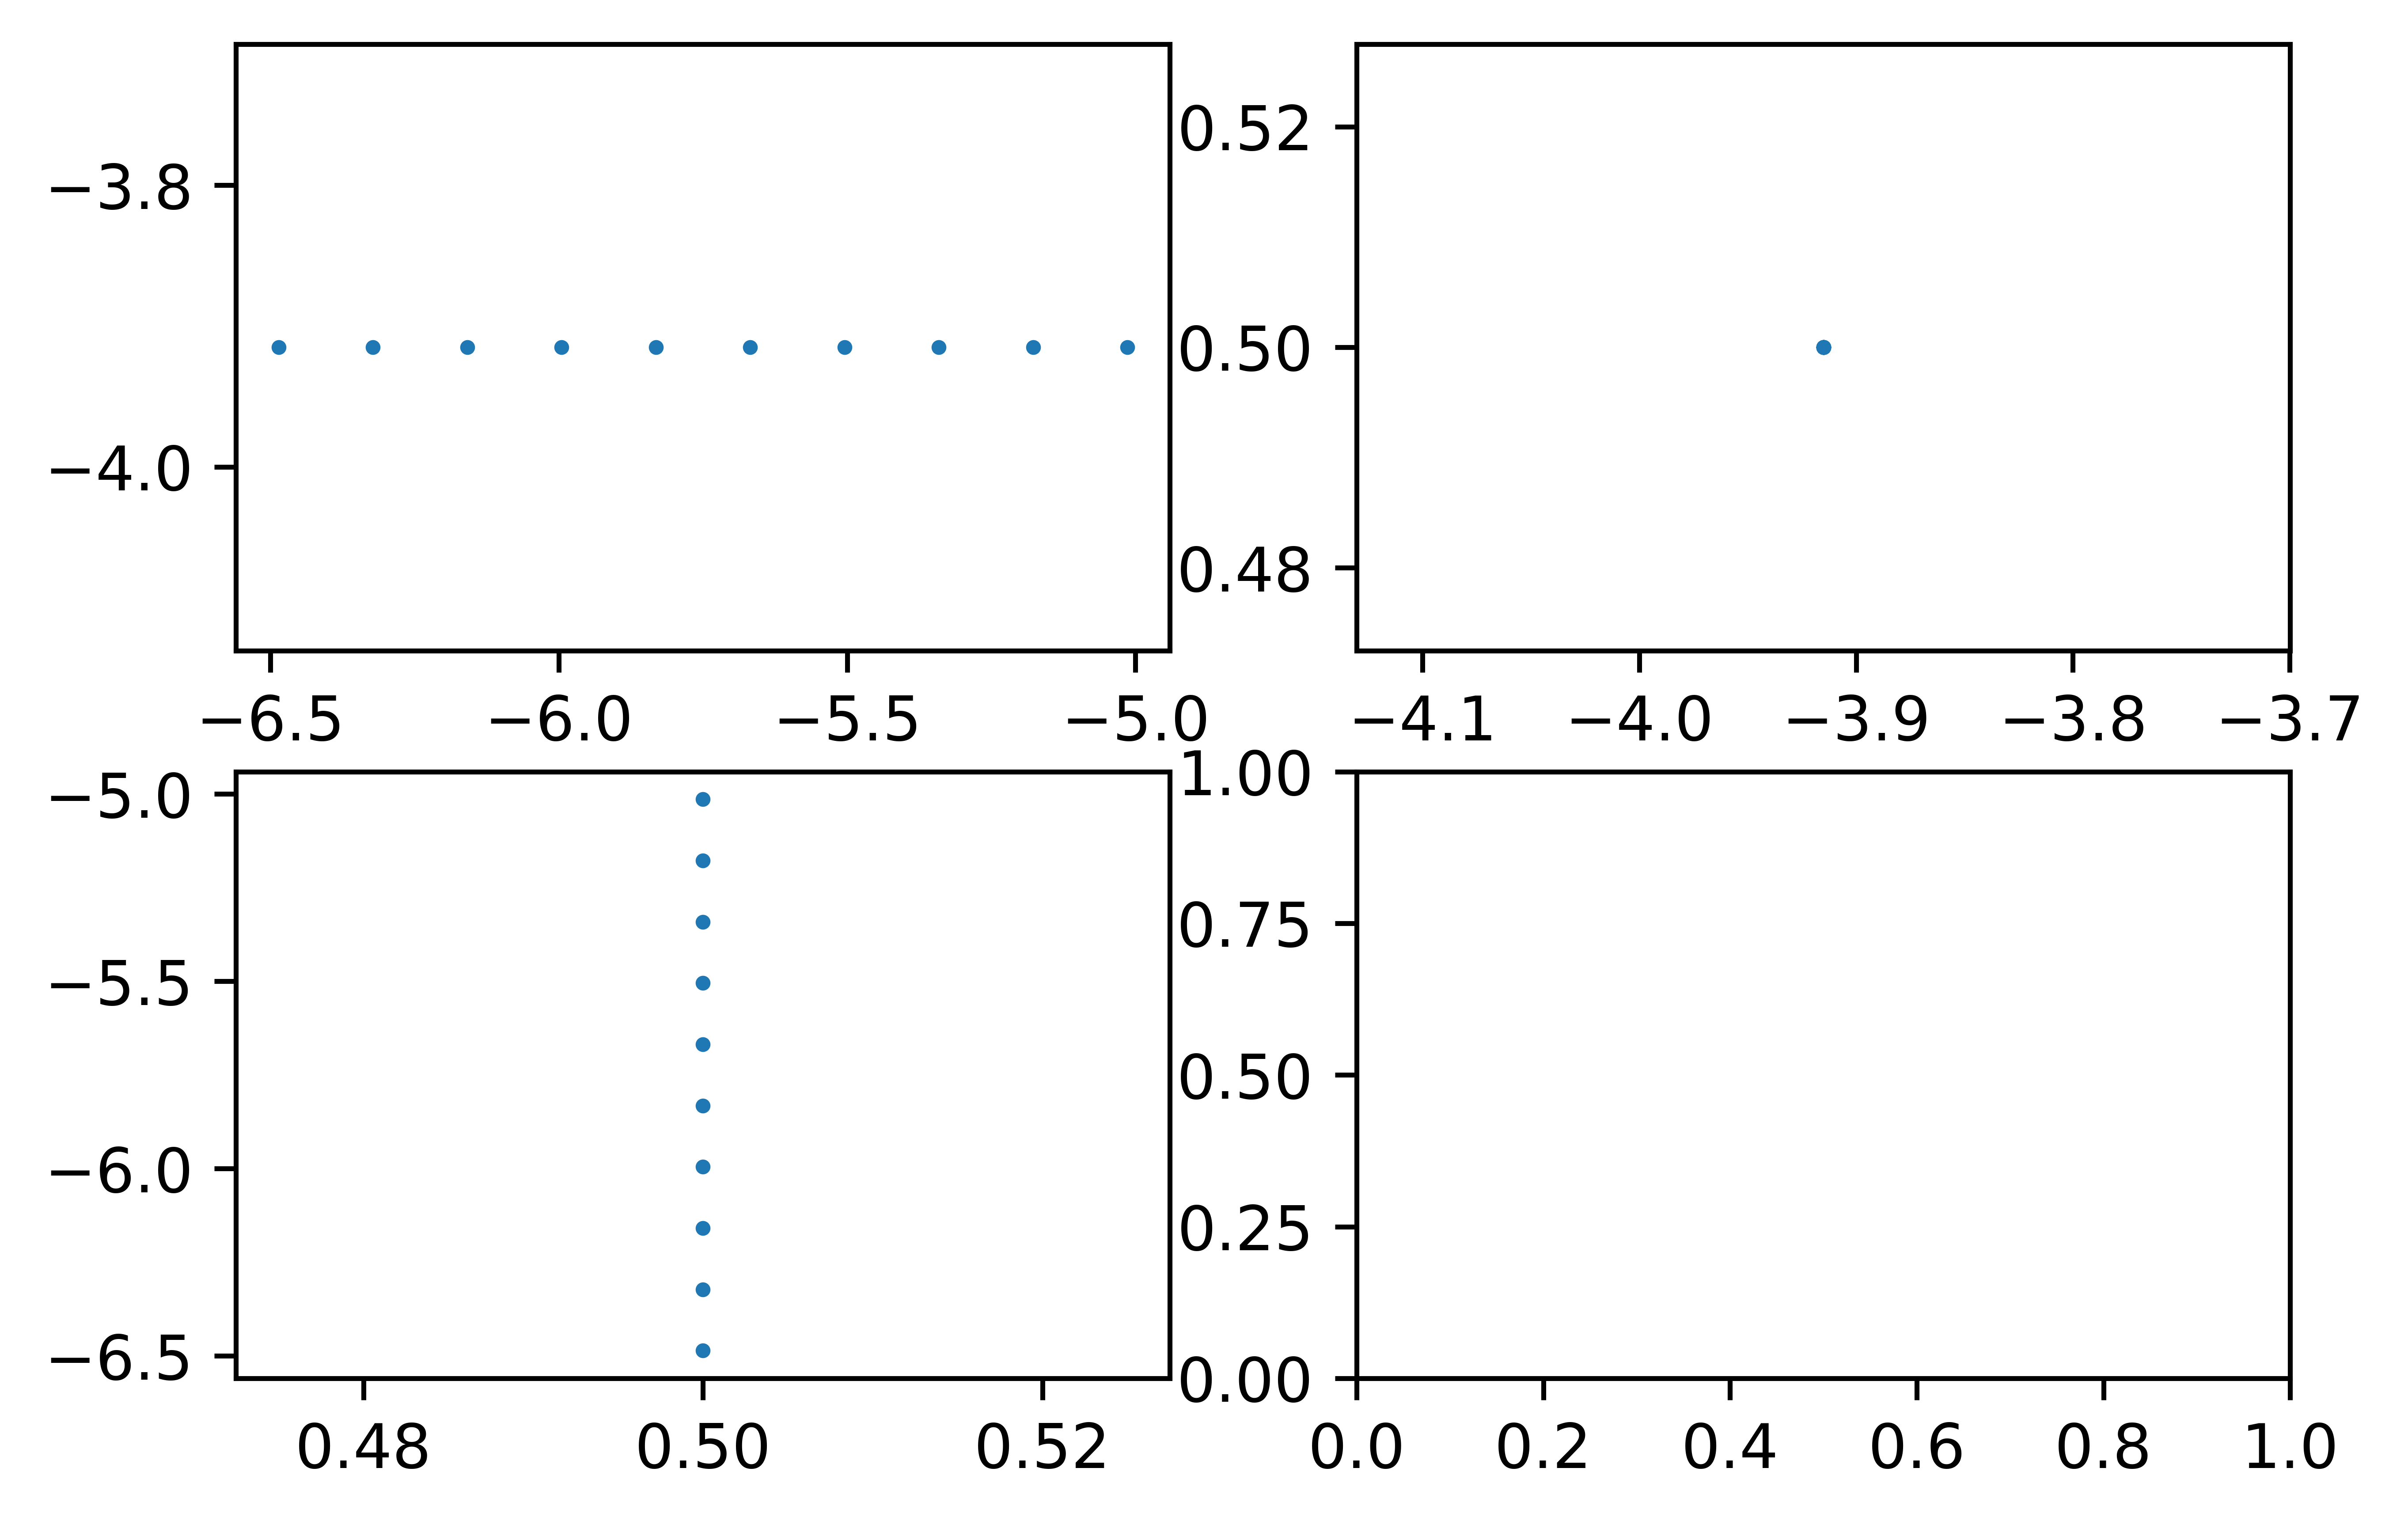

In [129]:
fig, axs = plt.subplots(2, 2)
fig.set_dpi(1000)
# axs[0, 0].scatter(positionx, positiony, s=2)
# axs[0, 1].scatter(positiony, positionz, s=2)
# axs[1, 0].scatter(positionz, positionx, s=2)

axs[0, 0].scatter(e_positionx, e_positiony, s=2)
axs[0, 1].scatter(e_positiony, e_positionz, s=2)
axs[1, 0].scatter(e_positionz, e_positionx, s=2)

# axs = plt.axes(projection='3d')
# axs.plot(positionx, positiony, positionz)